In [2]:
import csv
import pandas as pd
import numpy as np
import holidays
import datetime
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [3]:
# Get the directory of the current script
script_dir = os.getcwd()

# Navigate through the folder structure to access the dataset
data_dir = os.path.abspath(os.path.join(script_dir, '..', 'data', 'processed', 'Google'))

# Construct the path to the dataset
dataset_path = os.path.join(data_dir, "Google_MD_Piedmont_regions.csv")

# Read the dataset
data = pd.read_csv(dataset_path)
data['date'] = pd.to_datetime(data['date'], dayfirst=True, format= '%d/%m/%Y')
data

,sub_region_2,iso_3166_2_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,Metropolitan City of Turin,IT-TO,ChIJ_8Ubk5VFiEcRcH08R33mBQM,2020-02-15,0,-2.0,19.0,2.0,0.0,-1.0
1,Province of Alessandria,IT-AL,ChIJD07L2Ytwh0cRwH08R33mBQM,2020-02-15,-5,-6.0,26.0,12.0,0.0,-1.0
2,Province of Asti,IT-AT,ChIJ9ZIOjhqNh0cRsH08R33mBQM,2020-02-15,1,-1.0,15.0,5.0,0.0,-1.0
3,Province of Biella,IT-BI,ChIJza00X2IhhkcRYIM8R33mBQM,2020-02-15,-4,-5.0,39.0,1.0,1.0,-1.0
4,Province of Cuneo,IT-CN,ChIJedLPEntCzRIRoH08R33mBQM,2020-02-15,1,-1.0,18.0,10.0,0.0,-1.0
...,...,...,...,...,...,...,...,...,...,...
4011,Province of Biella,IT-BI,ChIJza00X2IhhkcRYIM8R33mBQM,2021-06-30,-4,6.0,74.0,-26.0,-25.0,1.0
4012,Province of Cuneo,IT-CN,ChIJedLPEntCzRIRoH08R33mBQM,2021-06-30,-2,13.0,94.0,-12.0,-20.0,-2.0
4013,Province of Novara,IT-NO,ChIJ2xgl4f5nhkcRkH08R33mBQM,2021-06-30,3,17.0,95.0,-30.0,-19.0,0.0
4014,Province of Verbano-Cusio-Ossola,IT-VB,ChIJz-0lPxTxhUcR0IM8R33mBQM,2021-06-30,10,-1.0,215.0,18.0,-26.0,-2.0


In [4]:
# 4 bacini: Torino, Cuneo, Sud-Est (Alessandria, Asti), Nord-Est (Biella, Novara, Verbania, Vercelli)

In [5]:
sudest = data[(data['iso_3166_2_code']=='IT-AT') | (data['iso_3166_2_code']=='IT-AL')]

# Select only numeric columns for calculating mean
numeric_cols = sudest.select_dtypes(include=['float64', 'int64']).columns

# Group by 'date' and compute mean for numeric columns
sudest_mean = sudest.groupby('date')[numeric_cols].mean().reset_index()

# Join the mean values back to the original DataFrame
sudest = sudest.merge(sudest_mean, on='date', suffixes=('', '_mean'))

# Drop non-numeric columns and duplicates
sudest = sudest.drop(['sub_region_2', 'iso_3166_2_code', 'place_id',
                      'retail_and_recreation_percent_change_from_baseline',
                      'grocery_and_pharmacy_percent_change_from_baseline',
                      'parks_percent_change_from_baseline',
                      'transit_stations_percent_change_from_baseline',
                      'workplaces_percent_change_from_baseline',
                      'residential_percent_change_from_baseline'], axis=1).drop_duplicates(subset=['date'])

sudest.insert(loc=0, column='bacino', value='Sud-Est')
sudest.columns = [col.replace('_mean', '') for col in sudest.columns]
sudest

,bacino,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,Sud-Est,2020-02-15,-2.0,-3.5,20.5,8.5,0.0,-1.0
2,Sud-Est,2020-02-16,3.0,-4.0,27.0,6.5,0.0,-1.0
4,Sud-Est,2020-02-17,-3.5,-1.0,-5.0,-1.5,0.0,0.5
6,Sud-Est,2020-02-18,-0.5,-2.5,17.0,2.0,1.5,0.0
8,Sud-Est,2020-02-19,-0.5,-0.5,11.5,-1.0,1.0,0.0
...,...,...,...,...,...,...,...,...
994,Sud-Est,2021-06-26,-11.5,-5.5,59.0,-8.5,-7.5,-3.0
996,Sud-Est,2021-06-27,-10.0,-13.0,95.0,-4.0,-6.0,-4.0
998,Sud-Est,2021-06-28,-4.5,6.5,67.0,-16.0,-19.0,1.0
1000,Sud-Est,2021-06-29,-2.5,6.5,54.5,-17.5,-19.0,0.0


In [19]:
#sudest = data[(data['iso_3166_2_code']=='IT-AT') | (data['iso_3166_2_code']=='IT-AL')]
#sudest = sudest.join(sudest.groupby('date').mean(), on='date', rsuffix='_mean').drop(['sub_region_2', 'iso_3166_2_code', 'place_id',
#       'retail_and_recreation_percent_change_from_baseline',
#       'grocery_and_pharmacy_percent_change_from_baseline',
#       'parks_percent_change_from_baseline',
#       'transit_stations_percent_change_from_baseline',
#       'workplaces_percent_change_from_baseline',
#       'residential_percent_change_from_baseline'], axis = 1).drop_duplicates(subset=['date'])
sudest.insert(loc=0, column='bacino', value='Sud-Est')
sudest.columns = [col.replace('_mean', '') for col in sudest.columns]
sudest

,bacino,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,Sud-Est,2020-02-15,-2.0,-3.5,20.5,8.5,0.0,-1.0
2,Sud-Est,2020-02-16,3.0,-4.0,27.0,6.5,0.0,-1.0
4,Sud-Est,2020-02-17,-3.5,-1.0,-5.0,-1.5,0.0,0.5
6,Sud-Est,2020-02-18,-0.5,-2.5,17.0,2.0,1.5,0.0
8,Sud-Est,2020-02-19,-0.5,-0.5,11.5,-1.0,1.0,0.0
...,...,...,...,...,...,...,...,...
994,Sud-Est,2021-06-26,-11.5,-5.5,59.0,-8.5,-7.5,-3.0
996,Sud-Est,2021-06-27,-10.0,-13.0,95.0,-4.0,-6.0,-4.0
998,Sud-Est,2021-06-28,-4.5,6.5,67.0,-16.0,-19.0,1.0
1000,Sud-Est,2021-06-29,-2.5,6.5,54.5,-17.5,-19.0,0.0


In [7]:
nordest = data[(data['iso_3166_2_code']=='IT-BI') | (data['iso_3166_2_code']=='IT-NO') | (data['iso_3166_2_code']=='IT-VB') | (data['iso_3166_2_code']=='IT-VC')]

# Select only numeric columns for calculating mean
numeric_cols = nordest.select_dtypes(include=['float64', 'int64']).columns

# Group by 'date' and compute mean for numeric columns
nordest_mean = nordest.groupby('date')[numeric_cols].mean().reset_index()

# Join the mean values back to the original DataFrame
nordest = nordest.merge(nordest_mean, on='date', suffixes=('', '_mean'))

nordest = nordest.drop(['sub_region_2', 'iso_3166_2_code', 'place_id',
       'retail_and_recreation_percent_change_from_baseline',
       'grocery_and_pharmacy_percent_change_from_baseline',
       'parks_percent_change_from_baseline',
       'transit_stations_percent_change_from_baseline',
       'workplaces_percent_change_from_baseline',
       'residential_percent_change_from_baseline'], axis = 1).drop_duplicates(subset=['date'])

nordest.insert(loc=0, column='bacino', value='Nord-Est')
nordest.columns = [col.replace('_mean', '') for col in nordest.columns]
nordest

,bacino,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,Nord-Est,2020-02-15,-0.25,-2.25,31.25,9.00,0.75,-1.00
4,Nord-Est,2020-02-16,6.75,-0.50,11.00,11.50,3.00,-0.50
8,Nord-Est,2020-02-17,-2.50,1.25,2.00,2.00,0.50,0.00
12,Nord-Est,2020-02-18,2.25,-0.50,29.50,3.50,0.75,-0.25
16,Nord-Est,2020-02-19,1.00,-0.50,22.25,1.50,1.25,-0.25
...,...,...,...,...,...,...,...,...
1988,Nord-Est,2021-06-26,-8.50,3.00,140.25,6.25,-9.25,-2.25
1992,Nord-Est,2021-06-27,-6.25,-3.75,120.50,10.00,-7.50,-2.75
1996,Nord-Est,2021-06-28,-1.25,13.25,121.00,-14.75,-22.75,2.00
2000,Nord-Est,2021-06-29,-4.25,8.50,91.00,-20.75,-23.50,2.75


In [8]:
torino = data[(data['iso_3166_2_code']=='IT-TO')]
torino = torino.drop(['sub_region_2', 'iso_3166_2_code', 'place_id'], axis = 1)
torino.insert(loc=0, column='bacino', value='Torino')
torino

,bacino,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,Torino,2020-02-15,0,-2.0,19.0,2.0,0.0,-1.0
8,Torino,2020-02-16,-3,-6.0,0.0,4.0,0.0,-1.0
16,Torino,2020-02-17,0,0.0,4.0,1.0,0.0,0.0
24,Torino,2020-02-18,2,-2.0,23.0,3.0,0.0,0.0
32,Torino,2020-02-19,1,-2.0,17.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
3976,Torino,2021-06-26,-24,-8.0,14.0,-28.0,-13.0,-3.0
3984,Torino,2021-06-27,-24,-15.0,6.0,-20.0,-1.0,-6.0
3992,Torino,2021-06-28,-11,9.0,33.0,-30.0,-29.0,2.0
4000,Torino,2021-06-29,-10,8.0,34.0,-30.0,-28.0,2.0


In [9]:
cuneo = data[(data['iso_3166_2_code']=='IT-CN')]
cuneo = cuneo.drop(['sub_region_2', 'iso_3166_2_code', 'place_id'], axis = 1)
cuneo.insert(loc=0, column='bacino', value='Cuneo')
cuneo

,bacino,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
4,Cuneo,2020-02-15,1,-1.0,18.0,10.0,0.0,-1.0
12,Cuneo,2020-02-16,2,-3.0,10.0,16.0,1.0,-1.0
20,Cuneo,2020-02-17,-2,0.0,7.0,4.0,0.0,0.0
28,Cuneo,2020-02-18,3,-2.0,14.0,5.0,1.0,-1.0
36,Cuneo,2020-02-19,1,-2.0,17.0,6.0,1.0,0.0
...,...,...,...,...,...,...,...,...
3980,Cuneo,2021-06-26,-12,0.0,123.0,3.0,-17.0,-3.0
3988,Cuneo,2021-06-27,-10,-13.0,130.0,20.0,-6.0,-6.0
3996,Cuneo,2021-06-28,-3,15.0,111.0,-10.0,-21.0,-1.0
4004,Cuneo,2021-06-29,-1,17.0,86.0,-14.0,-20.0,-2.0


In [10]:
cuneo.isnull().sum()

bacino                                                 0
date                                                   0
retail_and_recreation_percent_change_from_baseline     0
grocery_and_pharmacy_percent_change_from_baseline      0
parks_percent_change_from_baseline                    20
transit_stations_percent_change_from_baseline          0
workplaces_percent_change_from_baseline                0
residential_percent_change_from_baseline               0
dtype: int64

In [11]:
sudest.isnull().sum()

bacino                                                 0
date                                                   0
retail_and_recreation_percent_change_from_baseline     0
grocery_and_pharmacy_percent_change_from_baseline      0
parks_percent_change_from_baseline                    25
transit_stations_percent_change_from_baseline          0
workplaces_percent_change_from_baseline                0
residential_percent_change_from_baseline               0
dtype: int64

In [12]:
nordest.isnull().sum()

bacino                                                 0
date                                                   0
retail_and_recreation_percent_change_from_baseline     0
grocery_and_pharmacy_percent_change_from_baseline      0
parks_percent_change_from_baseline                    21
transit_stations_percent_change_from_baseline          0
workplaces_percent_change_from_baseline                0
residential_percent_change_from_baseline               0
dtype: int64

In [13]:
torino.isnull().sum()

bacino                                                0
date                                                  0
retail_and_recreation_percent_change_from_baseline    0
grocery_and_pharmacy_percent_change_from_baseline     0
parks_percent_change_from_baseline                    0
transit_stations_percent_change_from_baseline         0
workplaces_percent_change_from_baseline               0
residential_percent_change_from_baseline              0
dtype: int64

In [14]:
# Data is missing only for some Parks

In [16]:
torino['retail_and_recreation_percent_change_from_baseline_rolling'] = torino.retail_and_recreation_percent_change_from_baseline.rolling(7).mean()#.shift(-3)
torino['grocery_and_pharmacy_percent_change_from_baseline_rolling'] = torino.grocery_and_pharmacy_percent_change_from_baseline.rolling(7).mean()
torino['parks_percent_change_from_baseline_rolling'] = torino.parks_percent_change_from_baseline.rolling(7).mean()
torino['transit_stations_percent_change_from_baseline_rolling'] = torino.transit_stations_percent_change_from_baseline.rolling(7).mean()
torino['workplaces_percent_change_from_baseline_rolling'] = torino.workplaces_percent_change_from_baseline.rolling(7).mean()
torino['residential_percent_change_from_baseline_rolling'] = torino.residential_percent_change_from_baseline.rolling(7).mean()

In [17]:
cuneo['retail_and_recreation_percent_change_from_baseline_rolling'] = cuneo.retail_and_recreation_percent_change_from_baseline.rolling(7).mean()#.shift(-3)
cuneo['grocery_and_pharmacy_percent_change_from_baseline_rolling'] = cuneo.grocery_and_pharmacy_percent_change_from_baseline.rolling(7).mean()
cuneo['parks_percent_change_from_baseline_rolling'] = cuneo.parks_percent_change_from_baseline.rolling(7).mean()
cuneo['transit_stations_percent_change_from_baseline_rolling'] = cuneo.transit_stations_percent_change_from_baseline.rolling(7).mean()
cuneo['workplaces_percent_change_from_baseline_rolling'] = cuneo.workplaces_percent_change_from_baseline.rolling(7).mean()
cuneo['residential_percent_change_from_baseline_rolling'] = cuneo.residential_percent_change_from_baseline.rolling(7).mean()

In [18]:
sudest['retail_and_recreation_percent_change_from_baseline_rolling'] = sudest.retail_and_recreation_percent_change_from_baseline.rolling(7).mean()#.shift(-3)
sudest['grocery_and_pharmacy_percent_change_from_baseline_rolling'] = sudest.grocery_and_pharmacy_percent_change_from_baseline.rolling(7).mean()
sudest['parks_percent_change_from_baseline_rolling'] = sudest.parks_percent_change_from_baseline.rolling(7).mean()
sudest['transit_stations_percent_change_from_baseline_rolling'] = sudest.transit_stations_percent_change_from_baseline.rolling(7).mean()
sudest['workplaces_percent_change_from_baseline_rolling'] = sudest.workplaces_percent_change_from_baseline.rolling(7).mean()
sudest['residential_percent_change_from_baseline_rolling'] = sudest.residential_percent_change_from_baseline.rolling(7).mean()

In [19]:
nordest['retail_and_recreation_percent_change_from_baseline_rolling'] = nordest.retail_and_recreation_percent_change_from_baseline.rolling(7).mean()#.shift(-3)
nordest['grocery_and_pharmacy_percent_change_from_baseline_rolling'] = nordest.grocery_and_pharmacy_percent_change_from_baseline.rolling(7).mean()
nordest['parks_percent_change_from_baseline_rolling'] = nordest.parks_percent_change_from_baseline.rolling(7).mean()
nordest['transit_stations_percent_change_from_baseline_rolling'] = nordest.transit_stations_percent_change_from_baseline.rolling(7).mean()
nordest['workplaces_percent_change_from_baseline_rolling'] = nordest.workplaces_percent_change_from_baseline.rolling(7).mean()
nordest['residential_percent_change_from_baseline_rolling'] = nordest.residential_percent_change_from_baseline.rolling(7).mean()

# **7-day rolling averages**

In [20]:
torino[torino['retail_and_recreation_percent_change_from_baseline_rolling'] == torino['retail_and_recreation_percent_change_from_baseline_rolling'].min()].date.iloc[0]

Timestamp('2020-04-05 00:00:00')

In [21]:
torino[torino['date'] == '2021-06-30'].retail_and_recreation_percent_change_from_baseline_rolling.iloc[0]

-14.285714285714286

In [22]:
torino[torino['retail_and_recreation_percent_change_from_baseline_rolling'] == torino[torino.date.dt.month == 8].retail_and_recreation_percent_change_from_baseline_rolling.min()].date.iloc[0]

Timestamp('2020-08-21 00:00:00')

In [23]:
torino[torino.date.dt.month == 8].retail_and_recreation_percent_change_from_baseline_rolling.min()

-40.285714285714285

C:\Users\mrnkl\AppData\Local\Temp\ipykernel_64972\4104704099.py:94: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Feb 2020', 'Mar 2020', 'Apr 2020', 'Mag 2020', 'Giu 2020', 'Lug 2020', 'Ago 2020', 'Set 2020', 'Ott 2020', 'Nov 2020', 'Dic 2020',


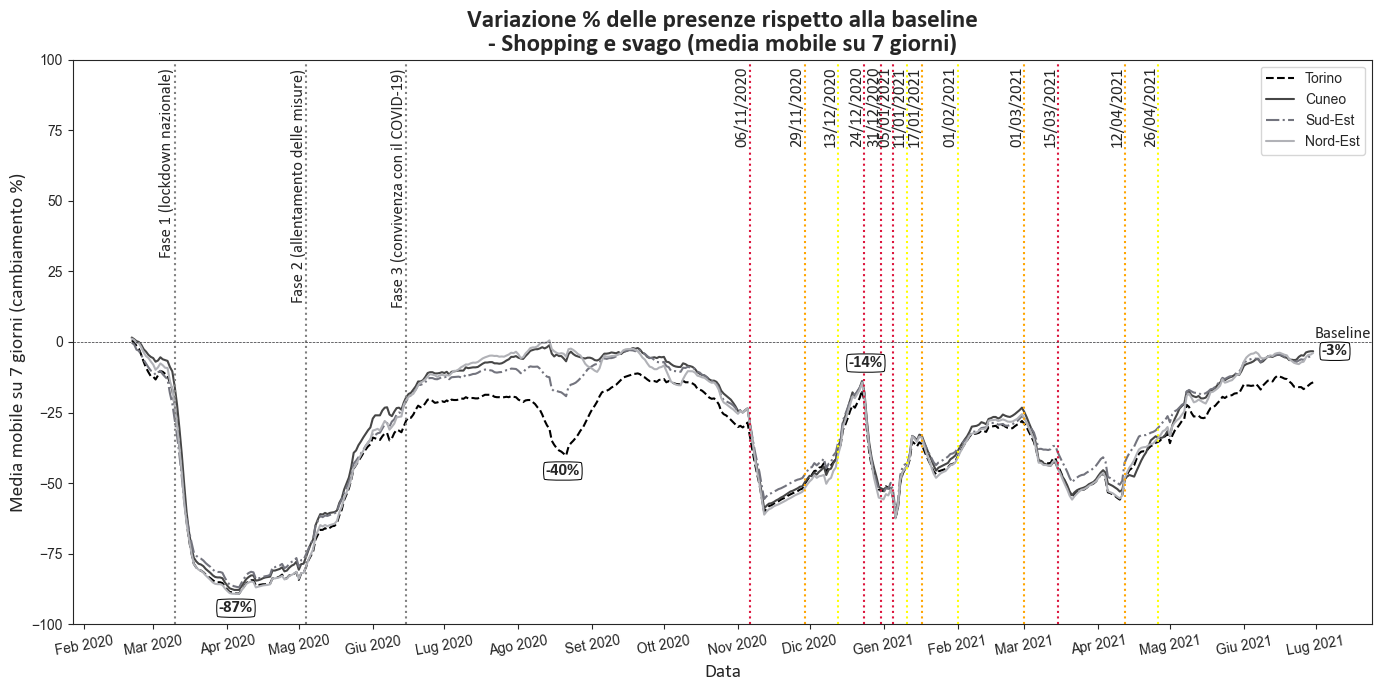

In [30]:
cfont = {'fontname':'Calibri'}

#sns.set_context("talk")
#sns.set(rc={"figure.figsize":(18, 7)})
sns.set_style('ticks')

fig, ax = plt.subplots(figsize = (14,7)) 

# Time series plot with Seaborn lineplot()
sns.lineplot(ax=ax, x="date", y="retail_and_recreation_percent_change_from_baseline_rolling", label= 'Torino', data=torino, errorbar=None, color='black', linestyle='--') #blue
sns.lineplot(ax=ax, x="date", y="retail_and_recreation_percent_change_from_baseline_rolling", label= 'Cuneo', data=cuneo, errorbar=None, color='#464646', linestyle='-') #darkgreen
sns.lineplot(ax=ax, x="date", y="retail_and_recreation_percent_change_from_baseline_rolling", label= 'Sud-Est', data=sudest, errorbar=None, color='#73747e', linestyle='-.')
sns.lineplot(ax=ax, x="date", y="retail_and_recreation_percent_change_from_baseline_rolling", label= 'Nord-Est', data=nordest, errorbar=None, color='#b1b2b7', linestyle='-')

# axis labels
ax.set_title("Variazione % delle presenze rispetto alla baseline\n- Shopping e svago (media mobile su 7 giorni)", size=18, weight= 'bold', **cfont)
ax.set_xlabel("Data", size=14, **cfont)
ax.set_ylabel("Media mobile su 7 giorni (cambiamento %)", size=14, **cfont)

phases = [pd.to_datetime('2020-03-10'), pd.to_datetime('2020-05-04'), pd.to_datetime('2020-06-15')]
for x in phases:
    ax.axvline(x=x, color='gray', linestyle=':')
    
red_zones = [pd.to_datetime('2020-11-06'), pd.to_datetime('2020-12-24'), pd.to_datetime('2020-12-31'), pd.to_datetime('2021-01-05'), pd.to_datetime('2021-03-15')]
for x in red_zones:
    ax.axvline(x=x, color='crimson', linestyle=':')
    
orange_zones = [pd.to_datetime('2020-11-29'), pd.to_datetime('2021-01-17'), pd.to_datetime('2021-03-01'), pd.to_datetime('2021-04-12')]
for x in orange_zones:
    ax.axvline(x=x, color='orange', linestyle=':')
    
yellow_zones = [pd.to_datetime('2020-12-13'), pd.to_datetime('2021-01-11'), pd.to_datetime('2021-02-01'), pd.to_datetime('2021-04-26')]
for x in yellow_zones:
    ax.axvline(x=x, color='yellow', linestyle=':')
    
annotations = pd.DataFrame({'x': [pd.to_datetime('2020-03-10'), pd.to_datetime('2020-05-04'), pd.to_datetime('2020-06-15'),
                                  pd.to_datetime('2020-11-06'), pd.to_datetime('2020-11-29'), pd.to_datetime('2020-12-13'), pd.to_datetime('2020-12-24'), pd.to_datetime('2020-12-31'),
                                  pd.to_datetime('2021-01-05'), pd.to_datetime('2021-01-11'), pd.to_datetime('2021-01-17'), pd.to_datetime('2021-02-01'), pd.to_datetime('2021-03-01'),
                                  pd.to_datetime('2021-03-15'), pd.to_datetime('2021-04-12'), pd.to_datetime('2021-04-26')], 
                            'y': [29, 13, 11, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68]}, 
                           index=['Fase 1 (lockdown nazionale)', 'Fase 2 (allentamento delle misure)', 'Fase 3 (convivenza con il COVID-19)', '06/11/2020', '29/11/2020', '13/12/2020', '24/12/2020', 
                                  '31/12/2020', '05/01/2021', '11/01/2021', '17/01/2021', '01/02/2021', '01/03/2021', '15/03/2021', '12/04/2021', '26/04/2021'])
for t, p in annotations.iterrows():
    ax.annotate(text=t, xy=p, xytext=(-11, 4), textcoords='offset points', rotation=90, fontsize=12, **cfont)

import matplotlib.dates as mdates


ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
#plt.gcf().autofmt_xdate() # Rotation

ax.axhline(y=0, color='#28282c', linestyle='--', linewidth=0.5)
ax.annotate(text='Baseline', xy=(pd.to_datetime('2021-07-01'), 0), xytext=(-1, 3), textcoords='offset points', rotation=0, fontsize=12, **cfont)

bbox_props = dict(boxstyle="round4, pad=0.15", fc="w", ec="k", lw=0.72)
#arrowprops=dict(arrowstyle="-|>", facecolor='black', connectionstyle="arc3")
kw = dict(xycoords='data', textcoords="offset points", fontsize=12, fontweight='bold', bbox=bbox_props, ha="right", va="top") #arrowprops=arrowprops

ax.annotate('{:,d}%'.format(np.round(sudest['retail_and_recreation_percent_change_from_baseline_rolling'].min()).astype(int)), 
            xy=(sudest[sudest['retail_and_recreation_percent_change_from_baseline_rolling'] == sudest['retail_and_recreation_percent_change_from_baseline_rolling'].min()].date.iloc[0],
                sudest['retail_and_recreation_percent_change_from_baseline_rolling'].min()),
            xytext=(10, -10), **cfont, **kw)

ax.annotate('{:,d}%'.format(np.round(torino[torino.date.dt.month == 8].retail_and_recreation_percent_change_from_baseline_rolling.min()).astype(int)), 
            xy=(torino[torino['retail_and_recreation_percent_change_from_baseline_rolling'] == torino[torino.date.dt.month == 8].retail_and_recreation_percent_change_from_baseline_rolling.min()].date.iloc[0],
                torino[torino.date.dt.month == 8].retail_and_recreation_percent_change_from_baseline_rolling.min()),
            xytext=(10, -6), **cfont, **kw)

ax.annotate('{:,d}%'.format(np.round(cuneo[cuneo.date.dt.month == 12].retail_and_recreation_percent_change_from_baseline_rolling.max()).astype(int)), 
            xy=(cuneo[cuneo['retail_and_recreation_percent_change_from_baseline_rolling'] == cuneo[cuneo.date.dt.month == 12].retail_and_recreation_percent_change_from_baseline_rolling.max()].date.iloc[0],
                cuneo[cuneo.date.dt.month == 12].retail_and_recreation_percent_change_from_baseline_rolling.max()),
            xytext=(15, 18), **cfont, **kw)

ax.annotate('{:,d}%'.format(np.round(cuneo[cuneo['date'] == '2021-06-30'].retail_and_recreation_percent_change_from_baseline_rolling.iloc[0]).astype(int)), 
            xy=(pd.to_datetime('2021-06-30'), cuneo[cuneo['date'] == '2021-06-30'].retail_and_recreation_percent_change_from_baseline_rolling.iloc[0]),
            xytext=(25, 5), **cfont, **kw)

def annot_max(x,y, ax=None):
    xmax = x[np.argmax(y)]
    ymax = y.max()
    text= "x={:.3f}, y={:.3f}".format(xmax, ymax)
    if not ax:
        ax=plt.gca()
    bbox_props = dict(boxstyle="round4, pad=0.25", fc="w", ec="k", lw=0.72)
    arrowprops=dict(arrowstyle="->",connectionstyle="angle,angleA=0,angleB=60")
    kw = dict(xycoords='data',textcoords="axes fraction",
              arrowprops=arrowprops, bbox=bbox_props, ha="right", va="top")
    ax.annotate(text, xy=(xmax, ymax), xytext=(0.94,0.96), **kw)



ax.set_ylim(-100, 100)
ax.set_xticklabels(['Feb 2020', 'Mar 2020', 'Apr 2020', 'Mag 2020', 'Giu 2020', 'Lug 2020', 'Ago 2020', 'Set 2020', 'Ott 2020', 'Nov 2020', 'Dic 2020',
                  'Gen 2021', 'Feb 2021', 'Mar 2021', 'Apr 2021', 'Mag 2021', 'Giu 2021', 'Lug 2021'])
plt.xticks(rotation=10)
fig.tight_layout()

# Change major ticks to show every 20.
#ax.xaxis.set_major_locator(MultipleLocator(20))

# Change minor ticks to show every 5. (20/4 = 5)
#ax.xaxis.set_minor_locator(AutoMinorLocator(4))

# Turn grid on for both major and minor ticks and style minor slightly
# differently.
#ax.grid(which='major', color='#CCCCCC', linestyle='--')
#ax.grid(which='minor', color='#CCCCCC', linestyle=':')

plt.show()

C:\Users\mrnkl\AppData\Local\Temp\ipykernel_64972\2223591688.py:78: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Feb 2020', 'Mar 2020', 'Apr 2020', 'Mag 2020', 'Giu 2020', 'Lug 2020', 'Ago 2020', 'Set 2020', 'Ott 2020', 'Nov 2020', 'Dic 2020',


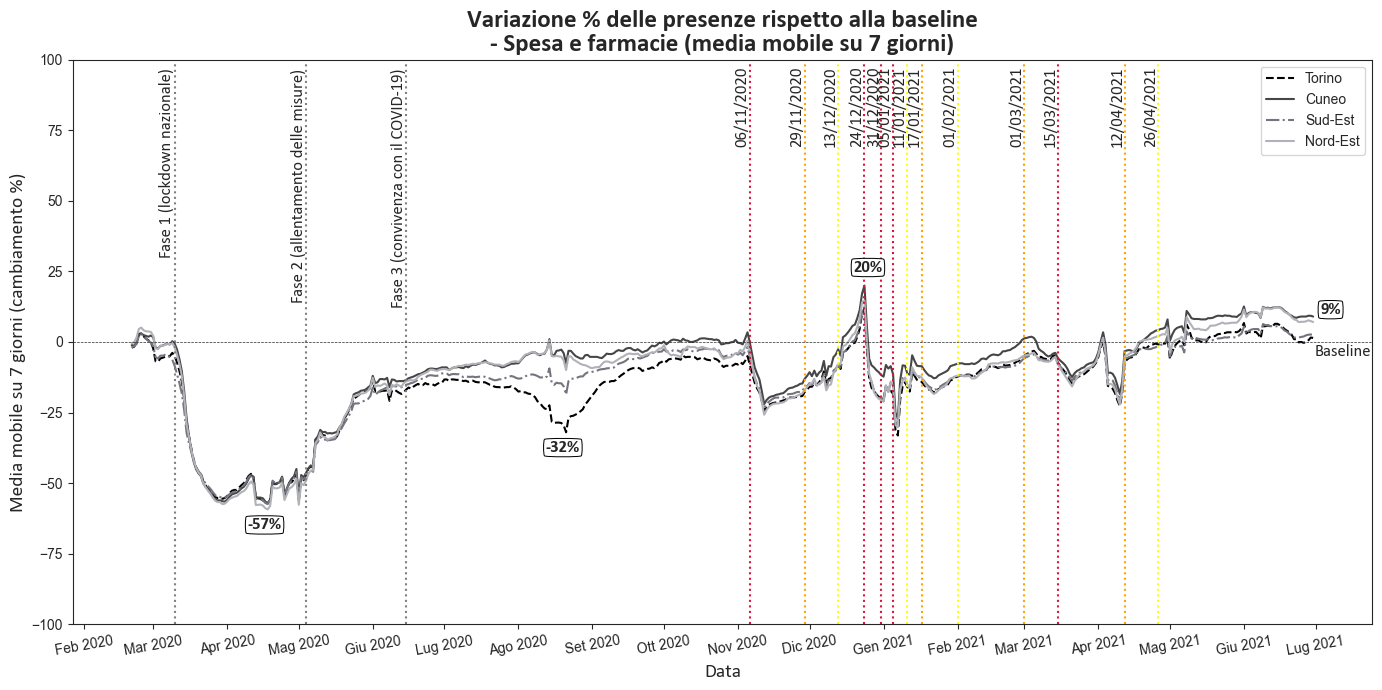

In [31]:
cfont = {'fontname':'Calibri'}

#sns.set_context("talk")
#sns.set(rc={"figure.figsize":(18, 7)})
sns.set_style('ticks')
fig, ax = plt.subplots(figsize = (14,7)) 

# Time series plot with Seaborn lineplot()
sns.lineplot(x="date", y="grocery_and_pharmacy_percent_change_from_baseline_rolling", label= 'Torino', data=torino, errorbar=None, color='black', linestyle='--')
sns.lineplot(x="date", y="grocery_and_pharmacy_percent_change_from_baseline_rolling", label= 'Cuneo', data=cuneo, errorbar=None, color='#464646', linestyle='-')
sns.lineplot(x="date", y="grocery_and_pharmacy_percent_change_from_baseline_rolling", label= 'Sud-Est', data=sudest, errorbar=None, color='#73747e', linestyle='-.')
sns.lineplot(x="date", y="grocery_and_pharmacy_percent_change_from_baseline_rolling", label= 'Nord-Est', data=nordest, errorbar=None, color='#b1b2b7', linestyle='-')

# axis labels
ax.set_title("Variazione % delle presenze rispetto alla baseline\n- Spesa e farmacie (media mobile su 7 giorni)", size=18, weight= 'bold', **cfont)
ax.set_xlabel("Data", size=14, **cfont)
ax.set_ylabel("Media mobile su 7 giorni (cambiamento %)", size=14, **cfont)

phases = [pd.to_datetime('2020-03-10'), pd.to_datetime('2020-05-04'), pd.to_datetime('2020-06-15')]
for x in phases:
    ax.axvline(x=x, color='gray', linestyle=':')
    
red_zones = [pd.to_datetime('2020-11-06'), pd.to_datetime('2020-12-24'), pd.to_datetime('2020-12-31'), pd.to_datetime('2021-01-05'), pd.to_datetime('2021-03-15')]
for x in red_zones:
    ax.axvline(x=x, color='crimson', linestyle=':')
    
orange_zones = [pd.to_datetime('2020-11-29'), pd.to_datetime('2021-01-17'), pd.to_datetime('2021-03-01'), pd.to_datetime('2021-04-12')]
for x in orange_zones:
    ax.axvline(x=x, color='orange', linestyle=':')
    
yellow_zones = [pd.to_datetime('2020-12-13'), pd.to_datetime('2021-01-11'), pd.to_datetime('2021-02-01'), pd.to_datetime('2021-04-26')]
for x in yellow_zones:
    ax.axvline(x=x, color='yellow', linestyle=':')
    
annotations = pd.DataFrame({'x': [pd.to_datetime('2020-03-10'), pd.to_datetime('2020-05-04'), pd.to_datetime('2020-06-15'),
                                  pd.to_datetime('2020-11-06'), pd.to_datetime('2020-11-29'), pd.to_datetime('2020-12-13'), pd.to_datetime('2020-12-24'), pd.to_datetime('2020-12-31'),
                                  pd.to_datetime('2021-01-05'), pd.to_datetime('2021-01-11'), pd.to_datetime('2021-01-17'), pd.to_datetime('2021-02-01'), pd.to_datetime('2021-03-01'),
                                  pd.to_datetime('2021-03-15'), pd.to_datetime('2021-04-12'), pd.to_datetime('2021-04-26')], 
                            'y': [29, 13, 11, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68]}, 
                           index=['Fase 1 (lockdown nazionale)', 'Fase 2 (allentamento delle misure)', 'Fase 3 (convivenza con il COVID-19)', '06/11/2020', '29/11/2020', '13/12/2020', '24/12/2020', 
                                  '31/12/2020', '05/01/2021', '11/01/2021', '17/01/2021', '01/02/2021', '01/03/2021', '15/03/2021', '12/04/2021', '26/04/2021'])
for t, p in annotations.iterrows():
    ax.annotate(text=t, xy=p, xytext=(-11, 4), textcoords='offset points', rotation=90, fontsize=12, **cfont)

import matplotlib.dates as mdates

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
#plt.gcf().autofmt_xdate() # Rotation

ax.axhline(y=0, color='#28282c', linestyle='--', linewidth=0.5)
ax.annotate(text='Baseline', xy=(pd.to_datetime('2021-07-01'), 0), xytext=(-1, -10), textcoords='offset points', rotation=0, fontsize=12, **cfont)

bbox_props = dict(boxstyle="round4, pad=0.15", fc="w", ec="k", lw=0.72)
#arrowprops=dict(arrowstyle="-|>", facecolor='black', connectionstyle="arc3")
kw = dict(xycoords='data', textcoords="offset points", fontsize=12, fontweight='bold', bbox=bbox_props, ha="right", va="top") #arrowprops=arrowprops

ax.annotate('{:,d}%'.format(np.round(sudest['grocery_and_pharmacy_percent_change_from_baseline_rolling'].min()).astype(int)), 
            xy=(sudest[sudest['grocery_and_pharmacy_percent_change_from_baseline_rolling'] == sudest['grocery_and_pharmacy_percent_change_from_baseline_rolling'].min()].date.iloc[0],
                sudest['grocery_and_pharmacy_percent_change_from_baseline_rolling'].min()),
            xytext=(10, -10), **cfont, **kw)

ax.annotate('{:,d}%'.format(np.round(torino[torino.date.dt.month == 8].grocery_and_pharmacy_percent_change_from_baseline_rolling.min()).astype(int)), 
            xy=(torino[torino['grocery_and_pharmacy_percent_change_from_baseline_rolling'] == torino[torino.date.dt.month == 8].grocery_and_pharmacy_percent_change_from_baseline_rolling.min()].date.iloc[0],
                torino[torino.date.dt.month == 8].grocery_and_pharmacy_percent_change_from_baseline_rolling.min()),
            xytext=(10, -6), **cfont, **kw)

ax.annotate('{:,d}%'.format(np.round(cuneo[cuneo.date.dt.month == 12].grocery_and_pharmacy_percent_change_from_baseline_rolling.max()).astype(int)), 
            xy=(cuneo[cuneo['grocery_and_pharmacy_percent_change_from_baseline_rolling'] == cuneo[cuneo.date.dt.month == 12].grocery_and_pharmacy_percent_change_from_baseline_rolling.max()].date.iloc[0],
                cuneo[cuneo.date.dt.month == 12].grocery_and_pharmacy_percent_change_from_baseline_rolling.max()),
            xytext=(13, 18), **cfont, **kw)

ax.annotate('{:,d}%'.format(np.round(cuneo[cuneo['date'] == '2021-06-30'].grocery_and_pharmacy_percent_change_from_baseline_rolling.iloc[0]).astype(int)), 
            xy=(pd.to_datetime('2021-06-30'), cuneo[cuneo['date'] == '2021-06-30'].grocery_and_pharmacy_percent_change_from_baseline_rolling.iloc[0]),
            xytext=(20, 10), **cfont, **kw)

ax.set_ylim(-100, 100)
ax.set_xticklabels(['Feb 2020', 'Mar 2020', 'Apr 2020', 'Mag 2020', 'Giu 2020', 'Lug 2020', 'Ago 2020', 'Set 2020', 'Ott 2020', 'Nov 2020', 'Dic 2020',
                  'Gen 2021', 'Feb 2021', 'Mar 2021', 'Apr 2021', 'Mag 2021', 'Giu 2021', 'Lug 2021'])
plt.xticks(rotation=10)
fig.tight_layout()

plt.show()

C:\Users\mrnkl\AppData\Local\Temp\ipykernel_64972\174356746.py:82: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Feb 2020', 'Mar 2020', 'Apr 2020', 'Mag 2020', 'Giu 2020', 'Lug 2020', 'Ago 2020', 'Set 2020', 'Ott 2020', 'Nov 2020', 'Dic 2020',


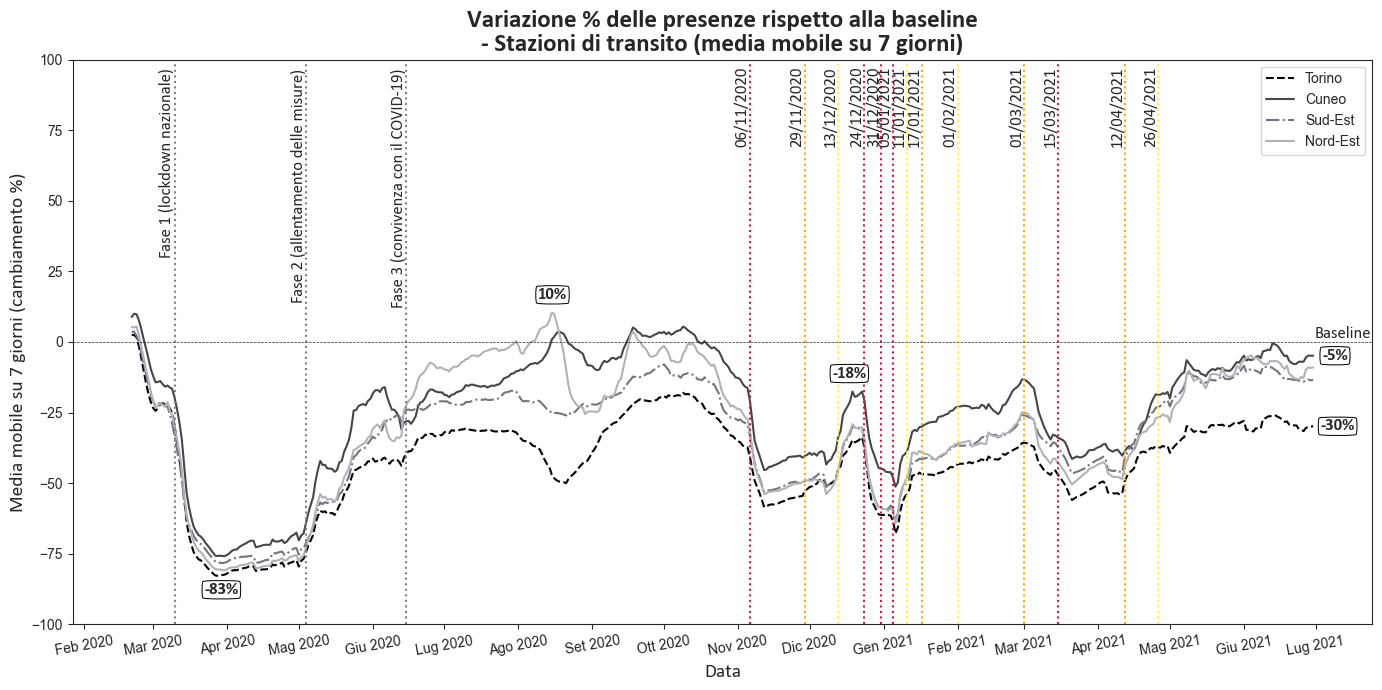

In [32]:
cfont = {'fontname':'Calibri'}

#sns.set_context("talk")
#sns.set(rc={"figure.figsize":(18, 7)})
sns.set_style('ticks')
fig, ax = plt.subplots(figsize = (14,7)) 

# Time series plot with Seaborn lineplot()
sns.lineplot(x="date", y="transit_stations_percent_change_from_baseline_rolling", label= 'Torino', data=torino, errorbar=None, color='black', linestyle='--')
sns.lineplot(x="date", y="transit_stations_percent_change_from_baseline_rolling", label= 'Cuneo', data=cuneo, errorbar=None, color='#464646', linestyle='-')
sns.lineplot(x="date", y="transit_stations_percent_change_from_baseline_rolling", label= 'Sud-Est', data=sudest, errorbar=None, color='#73747e', linestyle='-.')
sns.lineplot(x="date", y="transit_stations_percent_change_from_baseline_rolling", label= 'Nord-Est', data=nordest, errorbar=None, color='#b1b2b7', linestyle='-')

# axis labels
ax.set_title("Variazione % delle presenze rispetto alla baseline\n- Stazioni di transito (media mobile su 7 giorni)", size=18, weight= 'bold', **cfont)
ax.set_xlabel("Data", size=14, **cfont)
ax.set_ylabel("Media mobile su 7 giorni (cambiamento %)", size=14, **cfont)

phases = [pd.to_datetime('2020-03-10'), pd.to_datetime('2020-05-04'), pd.to_datetime('2020-06-15')]
for x in phases:
    ax.axvline(x=x, color='gray', linestyle=':')
    
red_zones = [pd.to_datetime('2020-11-06'), pd.to_datetime('2020-12-24'), pd.to_datetime('2020-12-31'), pd.to_datetime('2021-01-05'), pd.to_datetime('2021-03-15')]
for x in red_zones:
    ax.axvline(x=x, color='crimson', linestyle=':')
    
orange_zones = [pd.to_datetime('2020-11-29'), pd.to_datetime('2021-01-17'), pd.to_datetime('2021-03-01'), pd.to_datetime('2021-04-12')]
for x in orange_zones:
    ax.axvline(x=x, color='orange', linestyle=':')
    
yellow_zones = [pd.to_datetime('2020-12-13'), pd.to_datetime('2021-01-11'), pd.to_datetime('2021-02-01'), pd.to_datetime('2021-04-26')]
for x in yellow_zones:
    ax.axvline(x=x, color='yellow', linestyle=':')
    
annotations = pd.DataFrame({'x': [pd.to_datetime('2020-03-10'), pd.to_datetime('2020-05-04'), pd.to_datetime('2020-06-15'),
                                  pd.to_datetime('2020-11-06'), pd.to_datetime('2020-11-29'), pd.to_datetime('2020-12-13'), pd.to_datetime('2020-12-24'), pd.to_datetime('2020-12-31'),
                                  pd.to_datetime('2021-01-05'), pd.to_datetime('2021-01-11'), pd.to_datetime('2021-01-17'), pd.to_datetime('2021-02-01'), pd.to_datetime('2021-03-01'),
                                  pd.to_datetime('2021-03-15'), pd.to_datetime('2021-04-12'), pd.to_datetime('2021-04-26')], 
                            'y': [29, 13, 11, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68]}, 
                           index=['Fase 1 (lockdown nazionale)', 'Fase 2 (allentamento delle misure)', 'Fase 3 (convivenza con il COVID-19)', '06/11/2020', '29/11/2020', '13/12/2020', '24/12/2020', 
                                  '31/12/2020', '05/01/2021', '11/01/2021', '17/01/2021', '01/02/2021', '01/03/2021', '15/03/2021', '12/04/2021', '26/04/2021'])
for t, p in annotations.iterrows():
    ax.annotate(text=t, xy=p, xytext=(-11, 4), textcoords='offset points', rotation=90, fontsize=12, **cfont)

import matplotlib.dates as mdates

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
#plt.gcf().autofmt_xdate() # Rotation

ax.axhline(y=0, color='#28282c', linestyle='--', linewidth=0.5)
ax.annotate(text='Baseline', xy=(pd.to_datetime('2021-07-01'), 0), xytext=(-1, 3), textcoords='offset points', rotation=0, fontsize=12, **cfont)

bbox_props = dict(boxstyle="round4, pad=0.15", fc="w", ec="k", lw=0.72)
#arrowprops=dict(arrowstyle="-|>", facecolor='black', connectionstyle="arc3")
kw = dict(xycoords='data', textcoords="offset points", fontsize=12, fontweight='bold', bbox=bbox_props, ha="right", va="top") #arrowprops=arrowprops

ax.annotate('{:,d}%'.format(np.round(torino['transit_stations_percent_change_from_baseline_rolling'].min()).astype(int)), 
            xy=(torino[torino['transit_stations_percent_change_from_baseline_rolling'] == torino['transit_stations_percent_change_from_baseline_rolling'].min()].date.iloc[0],
                torino['transit_stations_percent_change_from_baseline_rolling'].min()),
            xytext=(15, -5), **cfont, **kw)

ax.annotate('{:,d}%'.format(np.round(cuneo[cuneo.date.dt.month == 12].transit_stations_percent_change_from_baseline_rolling.max()).astype(int)), 
            xy=(cuneo[cuneo['transit_stations_percent_change_from_baseline_rolling'] == cuneo[cuneo.date.dt.month == 12].transit_stations_percent_change_from_baseline_rolling.max()].date.iloc[1],
                cuneo[cuneo.date.dt.month == 12].transit_stations_percent_change_from_baseline_rolling.max()),
            xytext=(10, 18), **cfont, **kw)

ax.annotate('{:,d}%'.format(np.round(nordest[nordest.date.dt.month == 8].transit_stations_percent_change_from_baseline_rolling.max()).astype(int)), 
            xy=(nordest[nordest['transit_stations_percent_change_from_baseline_rolling'] == nordest[nordest.date.dt.month == 8].transit_stations_percent_change_from_baseline_rolling.max()].date.iloc[0],
                nordest[nordest.date.dt.month == 8].transit_stations_percent_change_from_baseline_rolling.max()),
            xytext=(11, 18), **cfont, **kw)

ax.annotate('{:,d}%'.format(np.round(cuneo[cuneo['date'] == '2021-06-30'].transit_stations_percent_change_from_baseline_rolling.iloc[0]).astype(int)), 
            xy=(pd.to_datetime('2021-06-30'), cuneo[cuneo['date'] == '2021-06-30'].transit_stations_percent_change_from_baseline_rolling.iloc[0]),
            xytext=(25, 5), **cfont, **kw)

ax.annotate('{:,d}%'.format(np.round(torino[torino['date'] == '2021-06-30'].transit_stations_percent_change_from_baseline_rolling.iloc[0]).astype(int)), 
            xy=(pd.to_datetime('2021-06-30'), torino[torino['date'] == '2021-06-30'].transit_stations_percent_change_from_baseline_rolling.iloc[0]),
            xytext=(30, 5), **cfont, **kw)

ax.set_ylim(-100, 100)
ax.set_xticklabels(['Feb 2020', 'Mar 2020', 'Apr 2020', 'Mag 2020', 'Giu 2020', 'Lug 2020', 'Ago 2020', 'Set 2020', 'Ott 2020', 'Nov 2020', 'Dic 2020',
                  'Gen 2021', 'Feb 2021', 'Mar 2021', 'Apr 2021', 'Mag 2021', 'Giu 2021', 'Lug 2021'])
plt.xticks(rotation=10)
fig.tight_layout()

plt.show()

C:\Users\mrnkl\AppData\Local\Temp\ipykernel_64972\3982399959.py:78: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Feb 2020', 'Mar 2020', 'Apr 2020', 'Mag 2020', 'Giu 2020', 'Lug 2020', 'Ago 2020', 'Set 2020', 'Ott 2020', 'Nov 2020', 'Dic 2020',


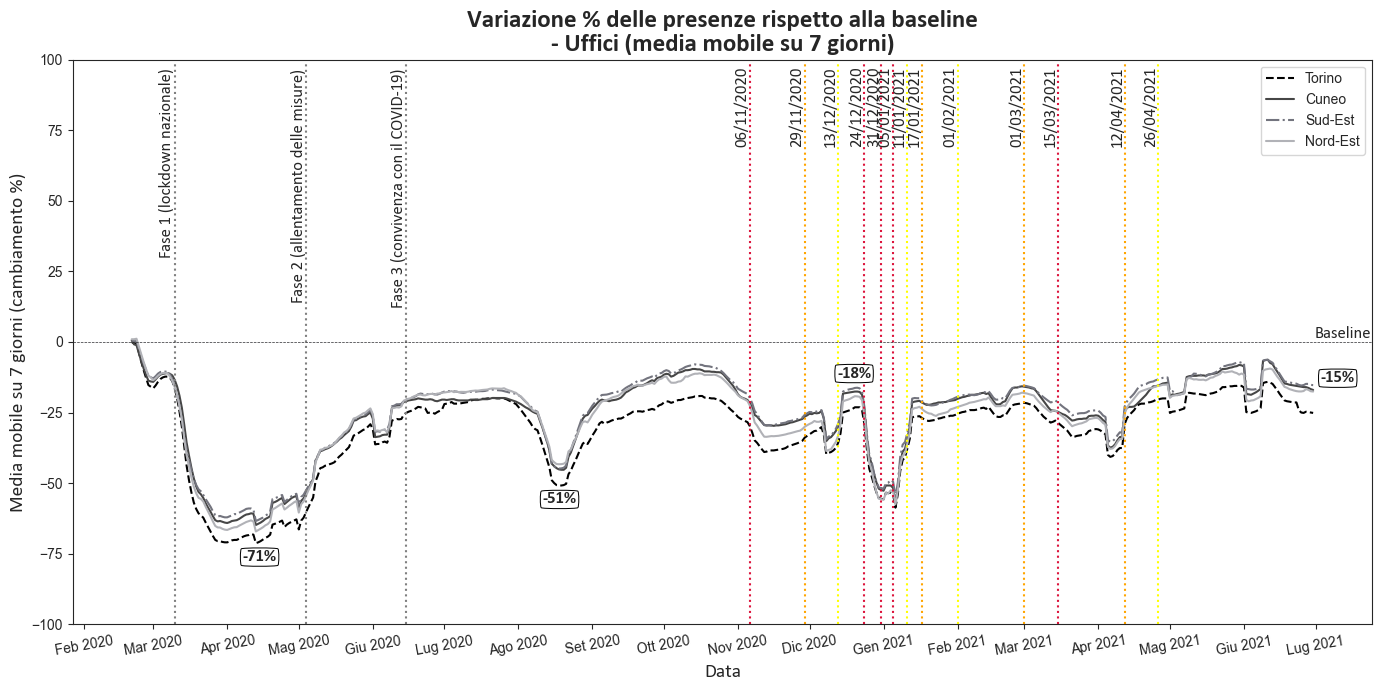

In [33]:
cfont = {'fontname':'Calibri'}

#sns.set_context("talk")
#sns.set(rc={"figure.figsize":(18, 7)})
sns.set_style('ticks')
fig, ax = plt.subplots(figsize = (14,7)) 

# Time series plot with Seaborn lineplot()
sns.lineplot(x="date", y="workplaces_percent_change_from_baseline_rolling", label= 'Torino', data=torino, errorbar=None, color='black', linestyle='--')
sns.lineplot(x="date", y="workplaces_percent_change_from_baseline_rolling", label= 'Cuneo', data=cuneo, errorbar=None, color='#464646', linestyle='-')
sns.lineplot(x="date", y="workplaces_percent_change_from_baseline_rolling", label= 'Sud-Est', data=sudest, errorbar=None, color='#73747e', linestyle='-.')
sns.lineplot(x="date", y="workplaces_percent_change_from_baseline_rolling", label= 'Nord-Est', data=nordest, errorbar=None, color='#b1b2b7', linestyle='-')

# axis labels
ax.set_title("Variazione % delle presenze rispetto alla baseline\n- Uffici (media mobile su 7 giorni)", size=18, weight= 'bold', **cfont)
ax.set_xlabel("Data", size=14, **cfont)
ax.set_ylabel("Media mobile su 7 giorni (cambiamento %)", size=14, **cfont)

phases = [pd.to_datetime('2020-03-10'), pd.to_datetime('2020-05-04'), pd.to_datetime('2020-06-15')]
for x in phases:
    ax.axvline(x=x, color='gray', linestyle=':')
    
red_zones = [pd.to_datetime('2020-11-06'), pd.to_datetime('2020-12-24'), pd.to_datetime('2020-12-31'), pd.to_datetime('2021-01-05'), pd.to_datetime('2021-03-15')]
for x in red_zones:
    ax.axvline(x=x, color='crimson', linestyle=':')
    
orange_zones = [pd.to_datetime('2020-11-29'), pd.to_datetime('2021-01-17'), pd.to_datetime('2021-03-01'), pd.to_datetime('2021-04-12')]
for x in orange_zones:
    ax.axvline(x=x, color='orange', linestyle=':')
    
yellow_zones = [pd.to_datetime('2020-12-13'), pd.to_datetime('2021-01-11'), pd.to_datetime('2021-02-01'), pd.to_datetime('2021-04-26')]
for x in yellow_zones:
    ax.axvline(x=x, color='yellow', linestyle=':')
    
annotations = pd.DataFrame({'x': [pd.to_datetime('2020-03-10'), pd.to_datetime('2020-05-04'), pd.to_datetime('2020-06-15'),
                                  pd.to_datetime('2020-11-06'), pd.to_datetime('2020-11-29'), pd.to_datetime('2020-12-13'), pd.to_datetime('2020-12-24'), pd.to_datetime('2020-12-31'),
                                  pd.to_datetime('2021-01-05'), pd.to_datetime('2021-01-11'), pd.to_datetime('2021-01-17'), pd.to_datetime('2021-02-01'), pd.to_datetime('2021-03-01'),
                                  pd.to_datetime('2021-03-15'), pd.to_datetime('2021-04-12'), pd.to_datetime('2021-04-26')], 
                            'y': [29, 13, 11, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68]}, 
                           index=['Fase 1 (lockdown nazionale)', 'Fase 2 (allentamento delle misure)', 'Fase 3 (convivenza con il COVID-19)', '06/11/2020', '29/11/2020', '13/12/2020', '24/12/2020', 
                                  '31/12/2020', '05/01/2021', '11/01/2021', '17/01/2021', '01/02/2021', '01/03/2021', '15/03/2021', '12/04/2021', '26/04/2021'])
for t, p in annotations.iterrows():
    ax.annotate(text=t, xy=p, xytext=(-11, 4), textcoords='offset points', rotation=90, fontsize=12, **cfont)

import matplotlib.dates as mdates

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
#plt.gcf().autofmt_xdate() # Rotation

ax.axhline(y=0, color='#28282c', linestyle='--', linewidth=0.5)
ax.annotate(text='Baseline', xy=(pd.to_datetime('2021-07-01'), 0), xytext=(-1, 3), textcoords='offset points', rotation=0, fontsize=12, **cfont)

bbox_props = dict(boxstyle="round4, pad=0.15", fc="w", ec="k", lw=0.72)
#arrowprops=dict(arrowstyle="-|>", facecolor='black', connectionstyle="arc3")
kw = dict(xycoords='data', textcoords="offset points", fontsize=12, fontweight='bold', bbox=bbox_props, ha="right", va="top") #arrowprops=arrowprops

ax.annotate('{:,d}%'.format(np.round(torino['workplaces_percent_change_from_baseline_rolling'].min()).astype(int)), 
            xy=(torino[torino['workplaces_percent_change_from_baseline_rolling'] == torino['workplaces_percent_change_from_baseline_rolling'].min()].date.iloc[0],
                torino['workplaces_percent_change_from_baseline_rolling'].min()),
            xytext=(15, -5), **cfont, **kw)

ax.annotate('{:,d}%'.format(np.round(cuneo[cuneo.date.dt.month == 12].workplaces_percent_change_from_baseline_rolling.max()).astype(int)), 
            xy=(cuneo[cuneo['workplaces_percent_change_from_baseline_rolling'] == cuneo[cuneo.date.dt.month == 12].workplaces_percent_change_from_baseline_rolling.max()].date.iloc[1],
                cuneo[cuneo.date.dt.month == 12].workplaces_percent_change_from_baseline_rolling.max()),
            xytext=(10, 18), **cfont, **kw)

ax.annotate('{:,d}%'.format(np.round(torino[torino.date.dt.month == 8].workplaces_percent_change_from_baseline_rolling.min()).astype(int)), 
            xy=(torino[torino['workplaces_percent_change_from_baseline_rolling'] == torino[torino.date.dt.month == 8].workplaces_percent_change_from_baseline_rolling.min()].date.iloc[1],
                torino[torino.date.dt.month == 8].workplaces_percent_change_from_baseline_rolling.min()),
            xytext=(11, -5), **cfont, **kw)

ax.annotate('{:,d}%'.format(np.round(sudest[sudest['date'] == '2021-06-30'].workplaces_percent_change_from_baseline_rolling.iloc[0]).astype(int)), 
            xy=(pd.to_datetime('2021-06-30'), sudest[sudest['date'] == '2021-06-30'].workplaces_percent_change_from_baseline_rolling.iloc[0]),
            xytext=(30, 10), **cfont, **kw)

ax.set_ylim(-100, 100)
ax.set_xticklabels(['Feb 2020', 'Mar 2020', 'Apr 2020', 'Mag 2020', 'Giu 2020', 'Lug 2020', 'Ago 2020', 'Set 2020', 'Ott 2020', 'Nov 2020', 'Dic 2020',
                  'Gen 2021', 'Feb 2021', 'Mar 2021', 'Apr 2021', 'Mag 2021', 'Giu 2021', 'Lug 2021'])
plt.xticks(rotation=10)
fig.tight_layout()

plt.show()